In [85]:
#!pip install import_ipynb

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [88]:
trainset = pd.read_csv('../data/train_set.csv')
X_train = trainset[trainset.columns.difference(['y'])]
Y_train = trainset["y"]

testset = pd.read_csv('../data/test_set.csv')
X_test = testset[testset.columns.difference(['y'])]
Y_test = testset["y"]

In [89]:
X_train

,0,1,10,12,14,16,2,4,6,8,age,campaign,day,job_0,job_1,job_2,job_3,month_1,month_3,previous
0,-0.426389,1.295798,0.0,0.0,0.0,0.0,-0.484884,1.0,0.0,0.0,0.315623,-0.599687,1.087366,0,1,0,0,0,0,-0.335657
1,-0.381390,0.490566,0.0,0.0,0.0,0.0,-0.484884,1.0,0.0,0.0,0.122065,0.687517,-0.015252,0,0,1,1,0,1,-0.335657
2,-0.383009,0.039443,0.0,0.0,0.0,0.0,-0.484884,1.0,0.0,1.0,1.380191,-0.277886,-0.627817,0,0,0,1,0,0,-0.335657
3,-0.247041,-0.072125,0.0,1.0,1.0,0.0,-0.484884,1.0,0.0,0.0,-0.361830,0.365716,0.842340,0,1,0,1,0,1,-0.335657
4,-0.293335,0.262579,0.0,1.0,1.0,0.0,2.432794,1.0,0.0,0.0,-0.652166,-0.599687,-0.872843,0,1,1,0,0,1,0.131670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21876,-0.434806,-0.741535,0.0,0.0,0.0,0.0,-0.484884,0.0,0.0,1.0,-1.329619,-0.277886,-1.607922,0,1,1,0,1,1,-0.335657
21877,-0.172259,0.131608,0.0,1.0,0.0,0.0,-0.484884,1.0,0.0,0.0,-0.942503,-0.599687,0.842340,0,0,1,0,1,0,-0.335657
21878,-0.368765,-0.203097,0.0,1.0,0.0,1.0,-0.484884,1.0,0.0,0.0,-0.458609,0.365716,0.229774,1,0,0,0,1,0,-0.335657
21879,-0.352902,-0.552354,0.0,1.0,1.0,0.0,-0.484884,1.0,0.0,1.0,0.218844,0.043915,-0.137765,0,0,0,1,0,1,-0.335657


In [90]:
X_test

,0,1,10,12,14,16,2,4,6,8,age,campaign,day,job_0,job_1,job_2,job_3,month_1,month_3,previous
0,1.756540,-0.246754,0.0,0.0,0.0,0.0,-0.484884,1.0,0.0,1.0,1.380191,-0.599687,1.332392,0,0,0,1,0,1,-0.335657
1,1.115225,0.010338,0.0,1.0,1.0,0.0,2.576877,1.0,0.0,0.0,-0.748945,-0.599687,-0.627817,0,1,0,0,0,0,1.533653
2,-0.351283,-0.828849,0.0,1.0,0.0,0.0,-0.484884,1.0,0.0,1.0,-0.942503,-0.599687,-1.117869,1,0,1,0,0,0,-0.335657
3,0.111978,-0.746385,0.0,0.0,0.0,0.0,-0.484884,1.0,0.0,0.0,1.864086,2.618323,1.454905,1,0,1,0,0,0,-0.335657
4,-0.388836,-0.620265,0.0,1.0,1.0,0.0,-0.484884,1.0,0.0,1.0,-0.845724,-0.599687,0.229774,0,0,1,0,0,0,-0.335657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,0.487508,0.398401,0.0,0.0,0.0,0.0,-0.115671,1.0,0.0,0.0,3.122212,-0.599687,0.107261,1,0,0,1,1,0,3.402963
9022,-0.271645,0.815569,0.0,0.0,1.0,0.0,-0.484884,0.0,0.0,0.0,-1.523177,-0.277886,0.107261,0,0,1,1,1,0,-0.335657
9023,-0.168051,3.682387,0.0,0.0,0.0,0.0,-0.484884,1.0,0.0,1.0,0.993076,0.043915,0.107261,0,0,1,1,1,0,-0.335657
9024,0.124604,1.155125,0.0,0.0,0.0,0.0,-0.484884,0.0,1.0,0.0,2.928654,-0.277886,0.107261,1,0,0,1,1,0,-0.335657


In [91]:
21881+9026

30907

# LOF

In [92]:
from sklearn.neighbors import LocalOutlierFactor

LocalOutlierFactor
- n_neighbors: neighbors 개수. 디폴트 20
- algorithm: nearest neighbors 계산 방법 ('auto', 'ball_tree', 'kd_tree', 'brute'}. 디폴트 'auto'
- metric: distance 계산 방법. 디폴트 'minkowski'
- novelty: True (for novelty detection - no oulier in train data), False (for outlier detection - ouliers in train data). 디폴트 False

In [93]:
# LOF 모델 적합
lof_model = LocalOutlierFactor(n_neighbors=15, novelty=True)
lof_model.fit(X_train)

LocalOutlierFactor(n_neighbors=15, novelty=True)

## 추정된 분포로 train & test 데이터 novelty score 생성

In [94]:
lof_train = - 1.0 * lof_model.score_samples(X_train) #이것으로 log likelihood 뽑아낼 수 있음. 크면 클수록 이상치로 정의해서 마이너스 붙임 그래서 negative log likelihood
lof_test = - 1.0 * lof_model.score_samples(X_test)

In [95]:
lof_train

array([1.11798158, 1.12884882, 1.00058858, ..., 1.23305738, 1.00439972,
       1.05400096])

In [96]:
lof_train.min()

0.9260459399163916

### train/test 데이터의 novelty score 분포 시각화

Text(0.5, 1.0, 'Test Data')

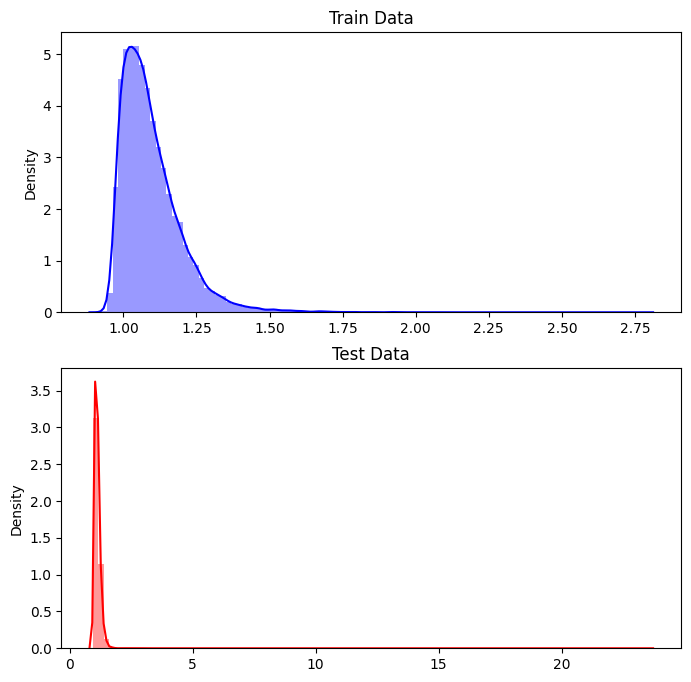

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8)) #2행 1열

sns.distplot(lof_train, bins=100, color='blue', ax=ax1) #negative log likelihood
# bin=100 : x 계급 구간을 100개로 counting 하겠다.
sns.distplot(lof_test, bins=100, color='red', ax=ax2)
ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### best f1 score 방식

In [98]:
# score의 min ~ max 범위를 num_step개로 균등 분할한 threshold에 대하여 best threshold 탐색 
def search_best_threshold(score, y_true, num_step):
    best_f1 = 0.5
    best_threshold = None
    for threshold in np.linspace(min(score), max(score), num_step): #min~max사이에 num_step여개 생성
        y_pred = threshold < score # true 값일 거고 threshold > score 이면 false

        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print('Best threshold: ', round(best_threshold, 4))
    print('Best F1 Score:', round(best_f1, 4))
    return best_threshold

In [99]:
# best threshold 도출
lof_best_threshold = search_best_threshold(lof_test, Y_test, num_step=1000)

Best threshold:  1.0276
Best F1 Score: 0.6898


### best threshold 기반 모델 평가

In [100]:
for i in range(1,9):
    lof_best_threshold = (10+i)/10
    lof_scores = pd.DataFrame()
    lof_scores['score'] = list(np.hstack([lof_train, lof_test]))
    lof_scores['anomaly'] = lof_best_threshold < lof_scores['score'] #true 값일 거고 threshold > score 이면 false
    lof_scores['anomaly'] = lof_scores['anomaly'].replace({True: 1, False: 0})
    print(len(lof_scores.loc[lof_scores['anomaly'] == 1]))

13103
4633
1540
581
234
102
52
26


In [101]:
lof_best_threshold = 1.199
lof_scores = pd.DataFrame()
lof_scores['score'] = list(np.hstack([lof_train, lof_test]))
lof_scores['anomaly'] = lof_best_threshold < lof_scores['score'] #true 값일 거고 threshold > score 이면 false
lof_scores['anomaly'] = lof_scores['anomaly'].replace({True: 1, False: 0})
print(len(lof_scores.loc[lof_scores['anomaly'] == 1]))

4684


In [102]:
4684/30907 * 100

15.155142847898533

In [103]:
lof_scores.loc[lof_scores['anomaly'] == 0]

,score,anomaly
0,1.117982,0
1,1.128849,0
2,1.000589,0
3,1.057917,0
4,1.144332,0
...,...,...
30901,1.144107,0
30902,1.123572,0
30904,1.022427,0
30905,1.076388,0


### FRR, FAR, F1 score 도출

In [104]:
def calculate_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = cm.ravel()
    
    frr = fp / (fp + tn)
    far = fn / (fn + tp) 
    
    f1 = f1_score(y_true, y_pred)

    sns.heatmap(pd.DataFrame(cm, columns = ['Predicted', 'Actual']),
            xticklabels=['Abnormal [1]', 'Normal [0]'], 
            yticklabels=['Abnormal [1]', 'Normal [0]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    return frr, far, f1

**  FRR: 0.1575  |  FAR: 0.7496  |  F1 Score: 0.3557


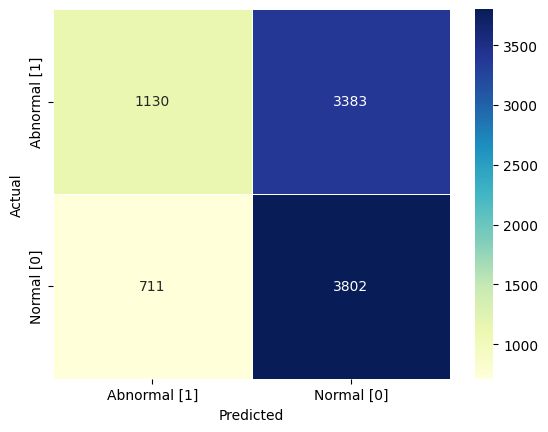

In [105]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, lof_scores['anomaly'].iloc[len(lof_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

## 적합시킨 모델 계속해서 예측하기

In [106]:
# train data에 대한 예측 값(정상=1, 이상=-1)
lof_train_pred = pd.DataFrame(lof_model.predict(X_train))
lof_train_pred = lof_train_pred.replace({-1: 1, 1: 0})
lof_train_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
21876,0
21877,0
21878,0
21879,0


In [107]:
lof_train_pred[0].value_counts()

0    21730
1      151
Name: 0, dtype: int64

In [108]:
# 이상 비율
len(lof_train_pred[lof_train_pred[0] == 1])/21881

0.0069009643069329555

In [109]:
# test data에 대한 예측 값(정상=1, 이상=-1) ->(정상=0, 이상=1)
lof_test_pred = pd.DataFrame(lof_model.predict(X_test))
lof_test_pred = lof_test_pred.replace({-1: 1, 1: 0})
lof_test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
9021,0
9022,0
9023,0
9024,0


In [113]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**  FRR: 0.0062  |  FAR: 0.9878  |  F1 Score: 0.0239


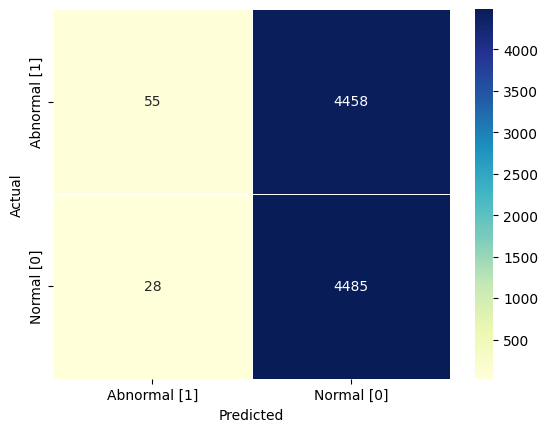

In [114]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, lof_test_pred)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

# KernelDensity

In [43]:
from sklearn.neighbors import KernelDensity

KernelDensity
  - kernel: 사용할 커널 종류 ('gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'). 디폴트 'gaussian'

## train 데이터 분포 추정

In [44]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=0.2) # 여기서 gaussian은 분포를 가정하는 게 아니라 커널 계산 종류로 지정
kde_model.fit(X_train)

KernelDensity(bandwidth=0.2)

## 추정된 분포로 train & test 데이터 novelty score 생성

In [45]:
# train/test 데이터의 -logpdf 도출 # 2분 걸림
kde_train = - 1.0 * kde_model.score_samples(X_train)
kde_test = - 1.0 * kde_model.score_samples(X_test)

### train/test 데이터의 novelty score 분포 시각화

Text(0.5, 1.0, 'Test Data')

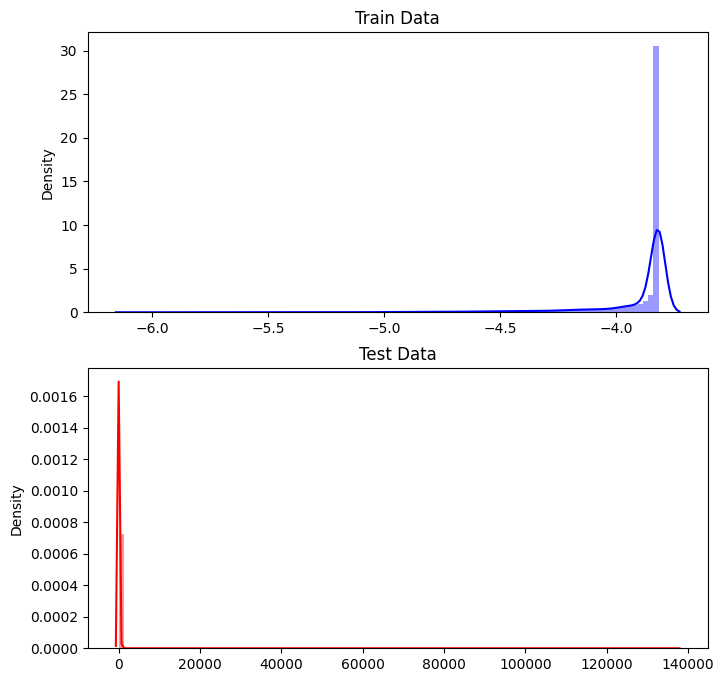

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8)) #2행 1열

sns.distplot(kde_train, bins=100, color='blue', ax=ax1) #negative log likelihood
# bin=100 : x 계급 구간을 100개로 counting 하겠다.
sns.distplot(kde_test, bins=100, color='red', ax=ax2)
ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### best f1 score 방식

In [47]:
# best threshold 도출
kde_best_threshold = search_best_threshold(kde_test, Y_test, num_step=1000)

Best threshold:  -5.9832
Best F1 Score: 0.6667


### best threshold 기반 모델 평가

In [48]:
kde_scores = pd.DataFrame()
kde_scores['score'] = list(np.hstack([kde_train, kde_test]))
kde_scores['anomaly'] = kde_best_threshold < kde_scores['score'] #true 값일 거고 threshold > score 이면 false
kde_scores['anomaly'] = kde_scores['anomaly'].replace({True: 1, False: 0})
kde_scores

,score,anomaly
0,-3.816614,1
1,-3.816615,1
2,-4.093714,1
3,-3.816737,1
4,-3.816614,1
...,...,...
30902,19.287982,1
30903,18.339074,1
30904,19.287594,1
30905,16.682001,1


### FRR, FAR, F1 score 도출

**  FRR: 0.9998  |  FAR: 0.0  |  F1 Score: 0.6667


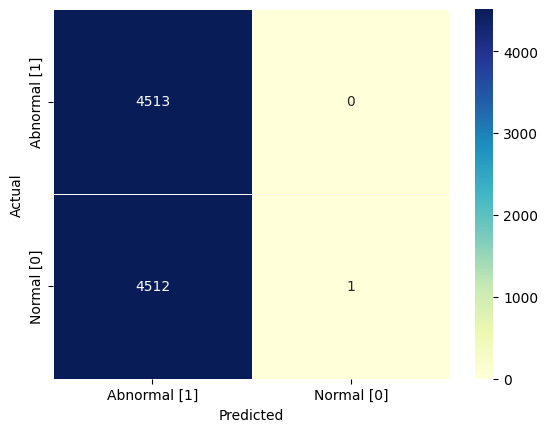

In [49]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, kde_scores['anomaly'].iloc[len(kde_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'정상' 모두를 '이상'이라고 한다!!

### threshold 변경

#### 실제 이상 개수(4513)와 비율 맞춰서 threshold 잡기

In [50]:
for i in range(0,20):
    kde_best_threshold = i
    kde_scores2 = pd.DataFrame()
    kde_scores2['score'] = list(np.hstack([kde_train, kde_test]))
    kde_scores2['anomaly'] = kde_best_threshold < kde_scores2['score'] #true 값일 거고 threshold > score 이면 false
    kde_scores2['anomaly'] = kde_scores2['anomaly'].replace({True: 1, False: 0})

    print(len(kde_scores2.loc[kde_scores2['anomaly'] == 1]))

7181
6808
6486
6224
5959
5700
5479
5287
5087
4881
4612
4331
4058
3793
3587
3336
3144
2937
2776
2604


In [51]:
1524+29383

30907

In [52]:
kde_best_threshold = 0

In [53]:
kde_scores2 = pd.DataFrame()
kde_scores2['score'] = list(np.hstack([kde_train, kde_test]))
kde_scores2['anomaly'] = kde_best_threshold < kde_scores2['score'] #true 값일 거고 threshold > score 이면 false
kde_scores2['anomaly'] = kde_scores2['anomaly'].replace({True: 1, False: 0})

In [54]:
len(kde_scores2.loc[kde_scores2['anomaly'] == 0])

23726

In [55]:
len(kde_scores2.loc[kde_scores2['anomaly'] == 1])

7181

In [56]:
4684/30907

0.15155142847898534

**  FRR: 0.9998  |  FAR: 0.0  |  F1 Score: 0.6667


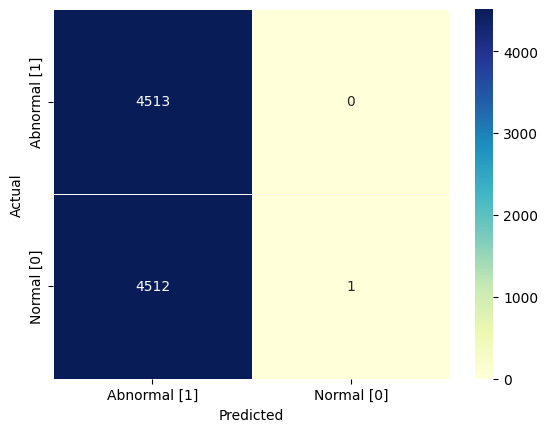

In [57]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, kde_scores['anomaly'].iloc[len(kde_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))